11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data: 60000
Test data: 10000


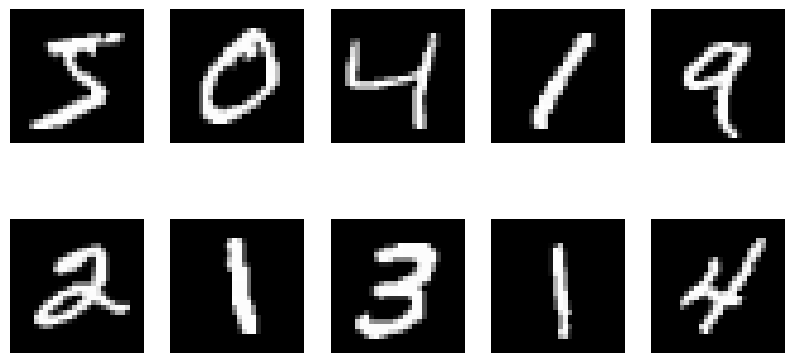

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8878 - loss: 0.3500 - val_accuracy: 0.9880 - val_loss: 0.0358
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9864 - loss: 0.0444 - val_accuracy: 0.9905 - val_loss: 0.0328
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9901 - loss: 0.0317 - val_accuracy: 0.9901 - val_loss: 0.0293
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0227 - val_accuracy: 0.9886 - val_loss: 0.0344
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9911 - val_loss: 0.0320
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9903 - val_loss: 0.0333
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0108 - val_accuracy: 0.9900 - val_loss: 0.0330
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9960 - loss: 0.0113 - 

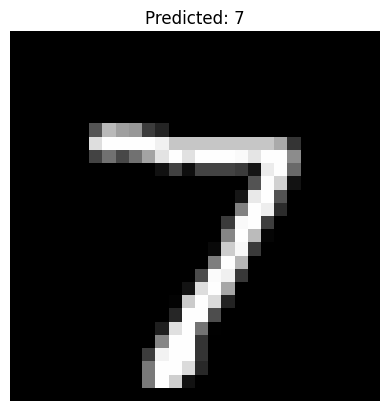

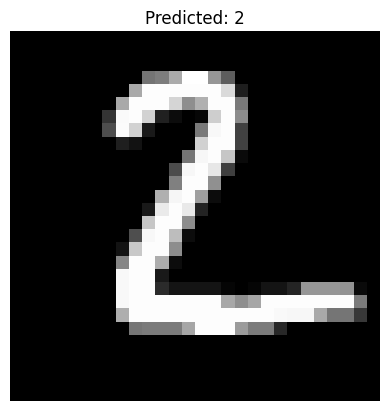

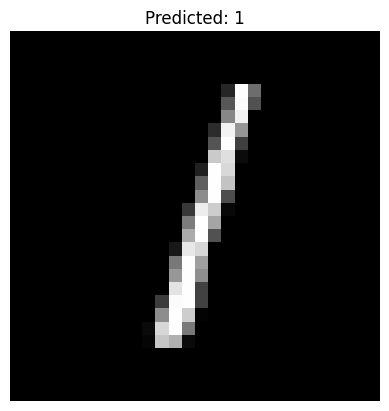

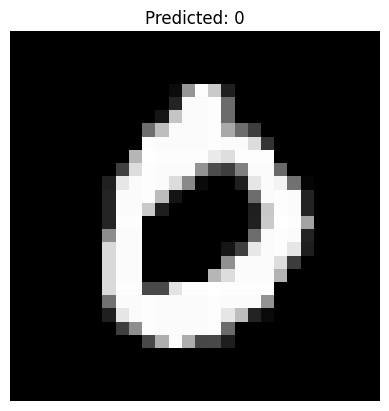

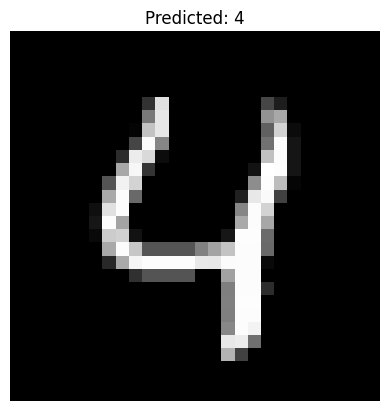

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Training data:", len(X_train))
print("Test data:", len(X_test))

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap="gray") 
    plt.axis('off')
plt.show()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    keras.Input(shape=(28,28,1)),  
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


model.save("cnnactivity.keras")


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


for i in range(5):
    plt.figure()  
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")  
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()